Exercise L13

Here it's just to visualize the dataset

(1797, 8, 8)
(1797, 64)


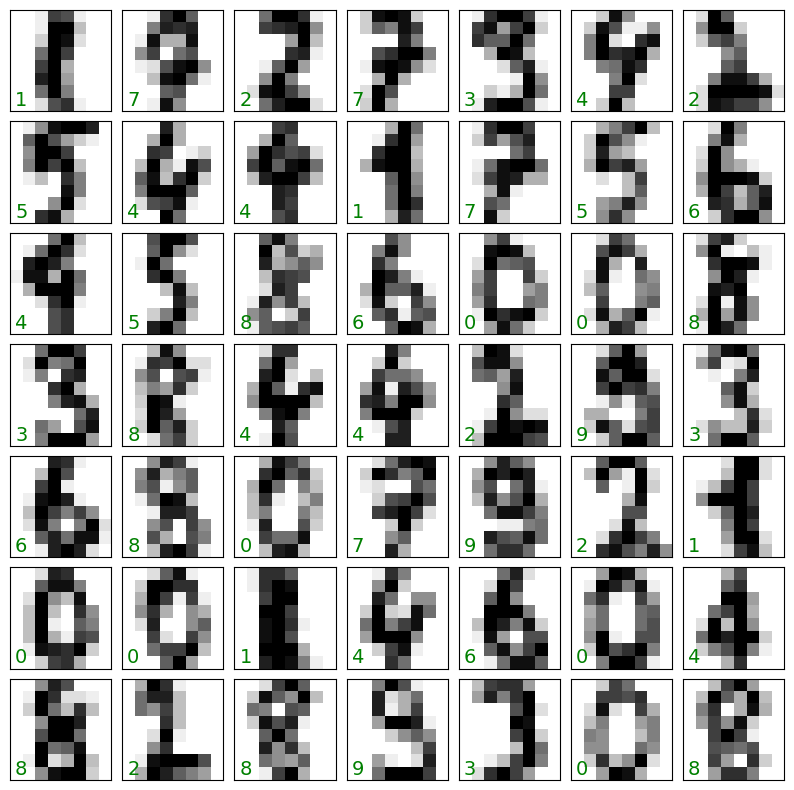

In [108]:
from sklearn import datasets
import matplotlib.pyplot as plt

import numpy as np

digits = datasets.load_digits()

print(digits.images.shape)

print(digits.data.shape)

fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])


Part 1: here the fetures are reduced from 8x8 to 2, just to visualize all the data set. It's a sort of unsupervised learning.

c:\Users\aleco\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\aleco\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


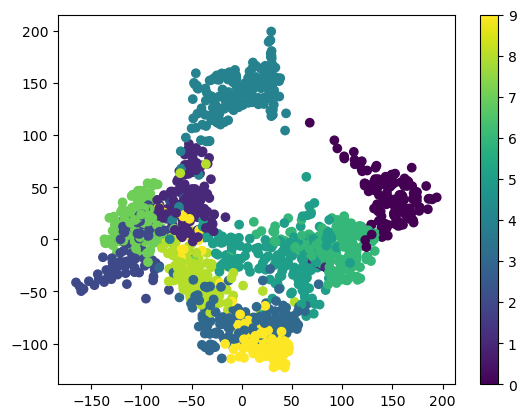

In [105]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)

X_transf = embedding.fit_transform(digits.data)

print(X_transf.shape)

plt.scatter(X_transf[:,0], X_transf[:,1], c=digits.target)
plt.colorbar()

Part 2: training and validation with a regression technique

1.0 0.9665738161559888
[[29  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  1  0  0 36  0  0  1  0  0]
 [ 0  0  0  0  0 41  0  0  0  1]
 [ 0  0  0  0  1  1 36  0  1  0]
 [ 0  0  0  0  0  0  0 34  1  0]
 [ 0  2  0  0  0  1  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  1 34]]


c:\Users\aleco\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


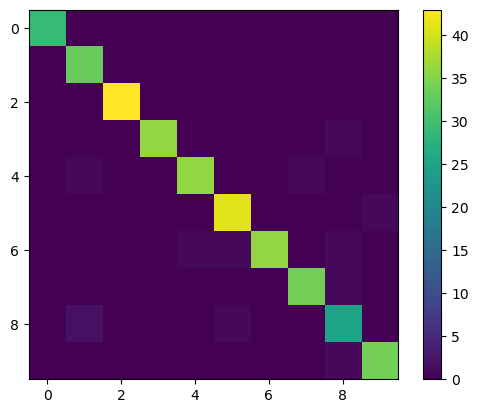

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

img_test, img_train, target_test, target_train = train_test_split(digits.data, digits.target, test_size=0.80, random_state=22)

model = LogisticRegression(solver='sag', random_state=55).fit(img_train, target_train)

acc_train = accuracy_score(target_train, model.predict(img_train))
acc_test = accuracy_score(target_test, model.predict(img_test))

print(acc_train, acc_test)

con_mat = confusion_matrix(target_test, model.predict(img_test))
print(con_mat)
plt.imshow(con_mat)
plt.colorbar()